<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


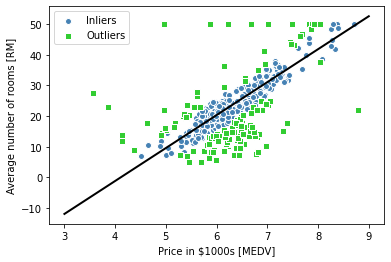

In [2]:
import numpy as np#벡터와 행렬 연산 
import pandas as pd#데이터 분석
from sklearn.datasets import load_boston#load_boston데이터 불러옴
import matplotlib.pyplot as plt#그래프 시각화 위함
from sklearn.linear_model import RANSACRegressor,LinearRegression#RANSAC,선형 회귀

boston=load_boston()#load_boston데이터 불러옴
data=pd.DataFrame(boston.data,columns=boston.feature_names)#칼럼을feature_names으로 2차원 데이터 저장
print(data.head())#데이터 첫줄 출력
X=data[['RM']].values#'RM'의 값을 X로 설정
y=boston.target#target정보 y로 설정

ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',residual_threshold=5.0,random_state=0)#최대 반복수100번,무작위 최소 샘플 개수 50개,절대손실,허용 오차 0.5
ransac.fit(X,y)#데이터 변환

inlier_mask=ransac.inlier_mask_#참으로 분류된 마스크
outlier_mask=np.logical_not(inlier_mask)#inlier_mask논리 부정 
line_X=np.arange(3,10,1)#3~10까지 배열형태로 반환
line_y_ransac=ransac.predict(line_X[:,np.newaxis])#np.newaxis로 2차원 배열 형태 맞추고 예측

plt.scatter(X[inlier_mask],y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')#steelblue색,o마크로 라벨은 Inliers로 산점도 출력
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')#limegreen색,s마크로 라벨은 Outliers로 산점도 출력
plt.plot(line_X,line_y_ransac,color='black',lw=2)#두께2로 검정색으로 x,y값 그래프 출력
plt.ylabel('Average number of rooms [RM]')#y라벨 설정
plt.xlabel('Price in $1000s [MEDV]')#x라벨 설정
plt.legend(loc='upper left')#범례설정
plt.show()#출력
